## Ensembling is nothing but the technique to combine several individual predictive models to come up with the final predictive model. 

## 1. Data processing

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## We can remove unnecessary data:

In [6]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [8]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [9]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
# the regular expression "[ A-Za-z] " specifies to match any single uppercase or lowercase letter.

pd.crosstab(train_df['Title'], train_df['Sex'])

# computes a frequency table of the factors unless an array of values and an
# aggregation function are passed.


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [10]:
# Find which occurs less no of times and classify it as rare

for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [11]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [12]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]

train_df.shape, test_df.shape

# No of rows and cols

((891, 9), (418, 9))

In [13]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [14]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [15]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [16]:
# Separate into 5 bins using pd.cut, each of equal size
train_df['AgeBand'] = pd.cut(train_df['Age'], bins = 5)

# Mean of survived for these age bins
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [17]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [18]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [19]:
# Family Size = no of siblings/spouse + no of parents/children

for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1 # including themsleves

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='FamilySize', ascending=True)

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [20]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [21]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [22]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [23]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [24]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [25]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [26]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [27]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


# This is our final dataset after all the pre processing

As we can see, every single attribute is in categorical form and not continuous, hence we proceed further


In [28]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


## 2. Bagging

Bagging, short for bootstrap aggregation, form a class of algorithms which use row sampling with replacement method to randomly allocate different rows of a datset to different models and then aggregate their individual predictions to form a final prediction.

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

## 2a. Model Fitting 

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop("Survived", axis=1), train_df["Survived"], test_size=0.3)

In [32]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("Accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print(f"Classification Report: \n {(classification_report(y_train, clf.predict(X_train)))}\n")
        print(f"Confusion Matrix: \n {(confusion_matrix(y_train, clf.predict(X_train)))}\n")
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("Accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print(f"Classification Report: \n {(classification_report(y_test, clf.predict(X_test)))}\n")
        print(f"Confusion Matrix: \n {(confusion_matrix(y_test, clf.predict(X_test)))}\n")    
        

## 2b. Decision Tree Classifier

In [34]:
clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

print_score(clf, X_train, y_train, X_test, y_test, train=True)
print("\n------------Test score without training---------------\n")
print_score(clf, X_train, y_train, X_test, y_test, train=False) # Test

Train Result:

Accuracy score: 0.8925

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       377
           1       0.91      0.80      0.86       246

    accuracy                           0.89       623
   macro avg       0.90      0.88      0.88       623
weighted avg       0.89      0.89      0.89       623


Confusion Matrix: 
 [[358  19]
 [ 48 198]]


------------Test score without training---------------

Test Result:

Accuracy score: 0.7537

Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.88      0.82       172
           1       0.71      0.52      0.60        96

    accuracy                           0.75       268
   macro avg       0.74      0.70      0.71       268
weighted avg       0.75      0.75      0.74       268


Confusion Matrix: 
 [[152  20]
 [ 46  50]]



In [35]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

bag_clf.fit(X_train, y_train)

print_score(bag_clf, X_train, y_train, X_test, y_test, train=True)

print_score(bag_clf, X_train, y_train, X_test, y_test, train=False)


Train Result:

Accuracy score: 0.8925

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       377
           1       0.87      0.85      0.86       246

    accuracy                           0.89       623
   macro avg       0.89      0.89      0.89       623
weighted avg       0.89      0.89      0.89       623


Confusion Matrix: 
 [[347  30]
 [ 37 209]]

Test Result:

Accuracy score: 0.7873

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       172
           1       0.73      0.64      0.68        96

    accuracy                           0.79       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.78      0.79      0.78       268


Confusion Matrix: 
 [[150  22]
 [ 35  61]]



## 2c. Decision Tree with oob_score

Out of box score: Use out-of-bag samples to estimate the generalization accuracy

In [36]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=1000,
                            bootstrap=True, oob_score=True,
                            n_jobs=-1, random_state=42)

In [37]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=1000, n_jobs=-1, oob_score=True,
                  random_state=42)

In [38]:
bag_clf.oob_score_

0.8378812199036918

In [39]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

Accuracy score: 0.8925

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       377
           1       0.87      0.85      0.86       246

    accuracy                           0.89       623
   macro avg       0.89      0.89      0.89       623
weighted avg       0.89      0.89      0.89       623


Confusion Matrix: 
 [[347  30]
 [ 37 209]]



In [40]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

Accuracy score: 0.7873

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       172
           1       0.73      0.64      0.68        96

    accuracy                           0.79       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.78      0.79      0.78       268


Confusion Matrix: 
 [[150  22]
 [ 35  61]]



## 2d. With random forest classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [42]:
rf_clf = RandomForestClassifier(random_state=42)

In [43]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

Accuracy score: 0.8925

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       377
           1       0.88      0.85      0.86       246

    accuracy                           0.89       623
   macro avg       0.89      0.88      0.89       623
weighted avg       0.89      0.89      0.89       623


Confusion Matrix: 
 [[348  29]
 [ 38 208]]



In [45]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

Accuracy score: 0.7761

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       172
           1       0.72      0.61      0.66        96

    accuracy                           0.78       268
   macro avg       0.76      0.74      0.75       268
weighted avg       0.77      0.78      0.77       268


Confusion Matrix: 
 [[149  23]
 [ 37  59]]



## 3. Boosting Technique:

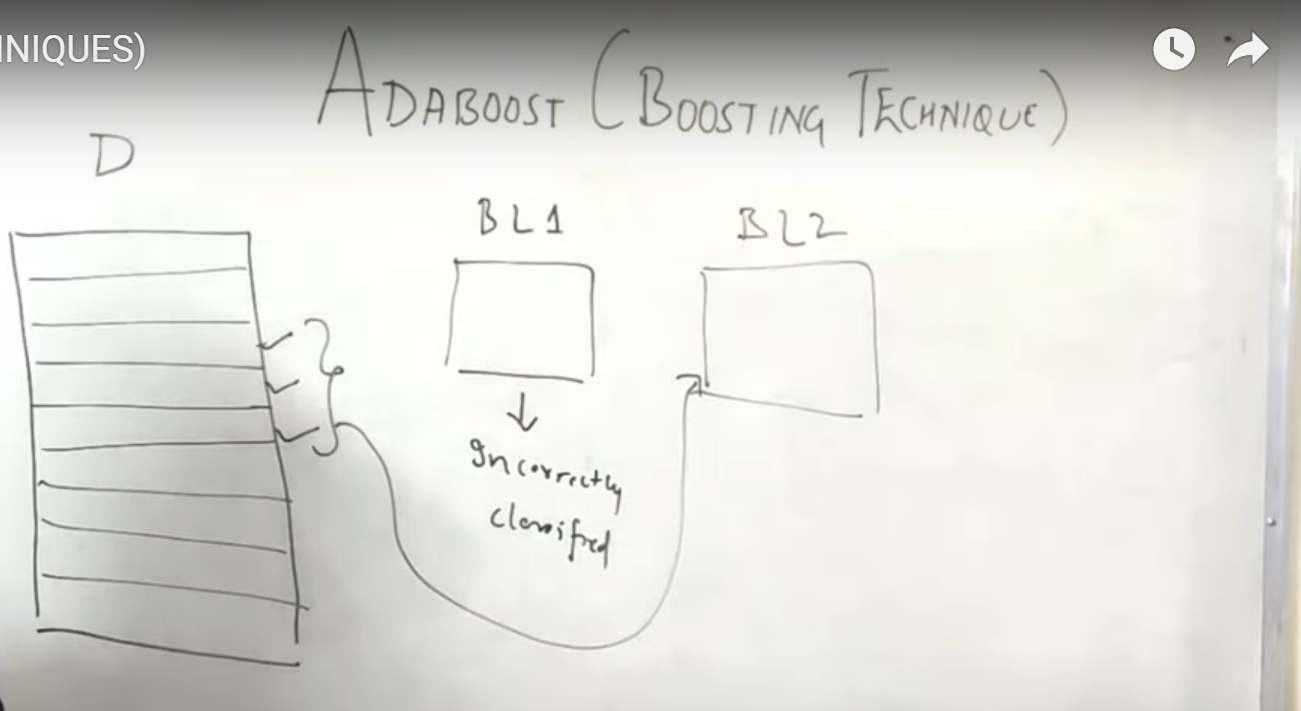

And so on, sequentially till we specify the no of base learners.

In [46]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier()

ada_clf.fit(X_train, y_train)

print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)

print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

Accuracy score: 0.8090

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       377
           1       0.76      0.76      0.76       246

    accuracy                           0.81       623
   macro avg       0.80      0.80      0.80       623
weighted avg       0.81      0.81      0.81       623


Confusion Matrix: 
 [[316  61]
 [ 58 188]]

Test Result:

Accuracy score: 0.7761

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       172
           1       0.71      0.62      0.67        96

    accuracy                           0.78       268
   macro avg       0.76      0.74      0.75       268
weighted avg       0.77      0.78      0.77       268


Confusion Matrix: 
 [[148  24]
 [ 36  60]]



## 3a. AdaBoost

Fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction.


In [47]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier()

ada_clf.fit(X_train, y_train)

print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)

print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

Accuracy score: 0.8090

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       377
           1       0.76      0.76      0.76       246

    accuracy                           0.81       623
   macro avg       0.80      0.80      0.80       623
weighted avg       0.81      0.81      0.81       623


Confusion Matrix: 
 [[316  61]
 [ 58 188]]

Test Result:

Accuracy score: 0.7761

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       172
           1       0.71      0.62      0.67        96

    accuracy                           0.78       268
   macro avg       0.76      0.74      0.75       268
weighted avg       0.77      0.78      0.77       268


Confusion Matrix: 
 [[148  24]
 [ 36  60]]



In [48]:
Y_pred = ada_clf.predict(test_df.drop('PassengerId',axis=1))

Y_pred

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submissions_ada.csv', index=False)

In [49]:
ada_clf = AdaBoostClassifier(RandomForestClassifier())

ada_clf.fit(X_train, y_train)

print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)

print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

ada_clf = AdaBoostClassifier(base_estimator=RandomForestClassifier())

ada_clf.fit(X_train, y_train)

print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)

print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

Accuracy score: 0.8925

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       377
           1       0.88      0.85      0.86       246

    accuracy                           0.89       623
   macro avg       0.89      0.88      0.89       623
weighted avg       0.89      0.89      0.89       623


Confusion Matrix: 
 [[348  29]
 [ 38 208]]

Test Result:

Accuracy score: 0.7649

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       172
           1       0.71      0.58      0.64        96

    accuracy                           0.76       268
   macro avg       0.75      0.72      0.73       268
weighted avg       0.76      0.76      0.76       268


Confusion Matrix: 
 [[149  23]
 [ 40  56]]

Train Result:

Accuracy score: 0.8925

Classification Report: 
               precision    recall  f1-score   support

          

In [50]:
Y_pred = ada_clf.predict(test_df.drop('PassengerId',axis=1))

Y_pred

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submissions_ada_random.csv', index=False)

## Ensemble of ensembles - model stacking
### Ensemble with different types of classifiers:
1. Different types of classifiers (E.g., logistic regression, decision trees, random forest, etc.) are fitted on the same training data
    Results are combined based on either
        majority voting (classification) or
        average (regression)
2. Ensemble with a single type of classifier:
        Bootstrap samples are drawn from training data
        With each bootstrap sample, model (E.g. may be decision trees, random forest, etc.) will be fitted
        All the results are combined to create an ensemble.
        Suitabe for highly flexible models that is prone to overfitting / high variance.